In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
import pandasql as psq

In [2]:
fraud=pd.read_csv(r"C:\Users\harsh\Downloads\archive\Fraud_dataset.csv")
fraud_bk=fraud.copy()
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
fraud.shape

(1048575, 11)

In [5]:
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
frauddup=fraud[fraud.duplicated(keep='last')]
frauddup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [7]:
fraud['isFraud'].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [8]:
fraud['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [9]:
fraud['type'].value_counts()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

In [10]:
fraud['nameOrig'].value_counts()

nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: count, Length: 1048317, dtype: int64

In [11]:

fraud=fraud.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [12]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [13]:
fraud['type']=fraud['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})
fraud['type']=fraud['type'].astype('int')

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 60.0 MB


In [15]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0


In [16]:
IndepVar=[]

for col in fraud.columns:
    if col!='isFraud':
        IndepVar.append(col)

TargetVar='isFraud'

x=fraud[IndepVar]
y=fraud[TargetVar]

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_test.shape,y_test.shape,y_train.shape

((734002, 7), (314573, 7), (314573,), (734002,))

In [18]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
618349,34,2,19392.97,171586.97,152194.00,0.00,0.00
766114,39,1,427752.86,460.00,0.00,581179.28,1008932.15
1045426,94,3,62811.14,9666855.45,9729666.59,123289.42,60478.28
415737,18,1,61403.15,42232.00,0.00,1298347.57,1359750.72
473060,19,1,154381.36,0.00,0.00,3461594.70,3615976.06


In [19]:
cols=['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [20]:
from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))

x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
618349,0.351064,0.25,0.001939,0.004411,0.003912,0.000000,0.000000
766114,0.404255,0.00,0.042775,0.000012,0.000000,0.013805,0.023908
1045426,0.989362,0.50,0.006281,0.248505,0.250120,0.002928,0.001433
415737,0.180851,0.00,0.006140,0.001086,0.000000,0.030840,0.032222
473060,0.191489,0.00,0.015438,0.000000,0.000000,0.082223,0.085687


In [21]:
from sklearn.linear_model import LogisticRegression

ModelLR = LogisticRegression()

ModelLR.fit(x_train, y_train)

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = y_test
predicted = y_pred
matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelLR.predict_proba(x_test)[:,1])
plt.figure()

Confusion matrix : 
 [[    33    316]
 [     4 314220]]
Outcome values : 
 33 316 4 314220
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.09      0.17       349
           0       1.00      1.00      1.00    314224

    accuracy                           1.00    314573
   macro avg       0.95      0.55      0.59    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy : 99.9 %
Precision : 89.2 %
Recall : 9.5 %
F1 Score : 0.171
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 54.8 %
MCC : 0.29
roc_auc_score: 0.547


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

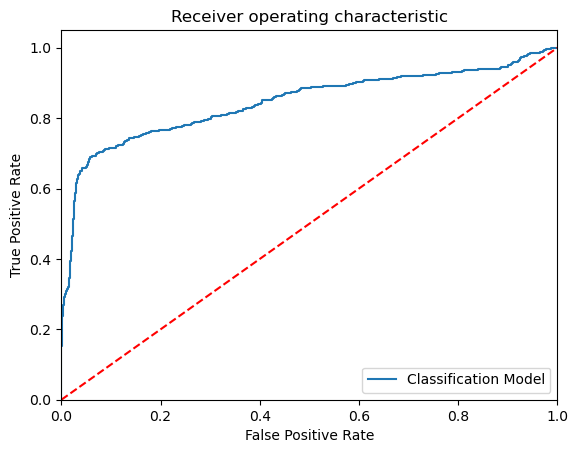

In [23]:
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [24]:
Results=pd.DataFrame({'fraud_A':y_test,'fraud_P':y_pred})

ResultsFinal = fraud_bk.merge(Results, left_index=True, right_index=True)

ResultsFinal.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fraud_A,fraud_P
365207,17,PAYMENT,13080.28,C1297963189,354784.02,341703.74,M1139125809,0.00,0.00,0,0,0,0
354462,17,PAYMENT,14745.07,C1953597200,0.00,0.00,M176491871,0.00,0.00,0,0,0,0
214653,13,PAYMENT,22705.37,C2106779099,32999.00,10293.63,M452426815,0.00,0.00,0,0,0,0
1036015,94,PAYMENT,2838.96,C615063403,188570.00,185731.04,M903327799,0.00,0.00,0,0,0,0
593543,33,CASH_OUT,27621.60,C11084738,0.00,0.00,C980770411,12000000.00,12000000.00,0,0,0,0
266472,15,CASH_OUT,529095.39,C1130540662,27993.00,0.00,C1929708784,414.00,397450.46,0,0,0,0
561257,22,PAYMENT,3372.70,C761459496,106447.00,103074.30,M1608272949,0.00,0.00,0,0,0,0
661194,36,CASH_OUT,449219.45,C168144104,15972.00,0.00,C21991437,76476.95,525696.40,0,0,0,0
1043816,94,PAYMENT,9879.91,C1326909841,5563.68,0.00,M726599321,0.00,0.00,0,0,0,0
820535,40,CASH_OUT,265337.27,C124708609,0.00,0.00,C225831023,2988992.41,3254329.67,0,0,0,0


# Random Forest Algorithm

In [25]:
from sklearn.ensemble import RandomForestClassifier 

ModelRF = RandomForestClassifier()
ModelRF.fit(x_train, y_train)

# Predict the model with test data

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

Confusion matrix : 
 [[   282     67]
 [    14 314210]]
Outcome values : 
 282 67 14 314210
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.81      0.87       349
           0       1.00      1.00      1.00    314224

    accuracy                           1.00    314573
   macro avg       0.98      0.90      0.94    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy : 100.0 %
Precision : 95.3 %
Recall : 80.8 %
F1 Score : 0.874
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 90.4 %
MCC : 0.877
roc_auc_score: 0.904


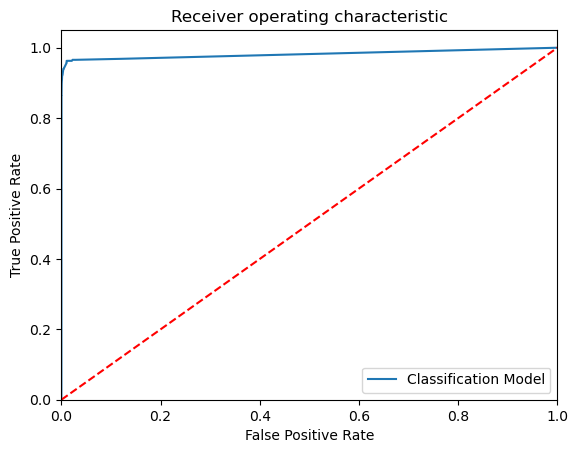

-----------------------------------------------------------------------------------------------------


In [26]:
# 'Confusion matrix' and 'classification report' in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

# KNN Algorithm

In [27]:
KNN_Results = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\Nasscom\knnresults.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[   239    110]
 [    56 314168]]
Outcome values : 
 239 110 56 314168
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.68      0.74       349
           0       1.00      1.00      1.00    314224

    accuracy                           1.00    314573
   macro avg       0.90      0.84      0.87    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy : 99.9 %
Precision : 81.0 %
Recall : 68.5 %
F1 Score : 0.742
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 84.2 %
MCC : 0.745
roc_auc_score: 0.842


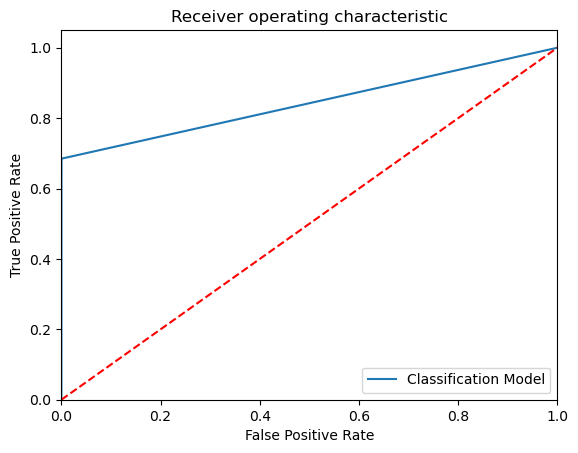

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[   219    130]
 [     5 314219]]
Outcome values : 
 219 130 5 314219
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.63      0.76       349
           0       1.00      1.00      1.00    314224

    accuracy                           1.00    314573
   macro avg       0.99      0.81      0.88    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy : 100.0 %
Precision : 97.8 %
Recall : 62.8 %
F1 Score : 0.764
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 81.4 %
MCC : 0.783
roc_auc_score: 0.814


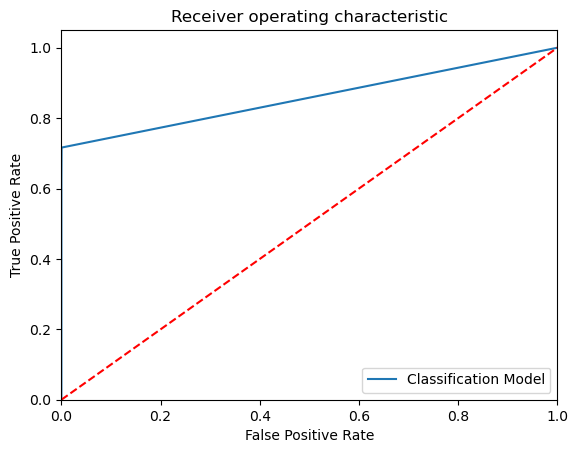

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[   224    125]
 [    12 314212]]
Outcome values : 
 224 125 12 314212
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.64      0.77       349
           0       1.00      1.00      1.00    314224

    accuracy                           1.00    314573
   macro avg       0.97      0.82      0.88    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy : 100.0 %
Precision : 94.9 %
Recall : 64.2 %
F1 Score : 0.766
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 82.1 %
MCC : 0.78
roc_auc_score: 0.821


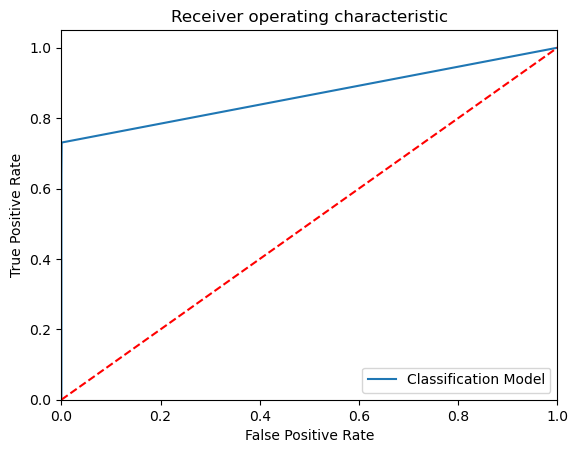

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[   217    132]
 [     1 314223]]
Outcome values : 
 217 132 1 314223
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.62      0.77       349
           0       1.00      1.00      1.00    314224

    accuracy                           1.00    314573
   macro avg       1.00      0.81      0.88    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy : 100.0 %
Precision : 99.5 %
Recall : 62.2 %
F1 Score : 0.765
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 81.1 %
MCC : 0.787
roc_auc_score: 0.811


In [ ]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results._append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------